# Notebook Assignment 3

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

# Verifica versione di OpenCV
print(cv.__version__)

3.4.2


In [2]:
# Imposta le dimensioni di visualizzazione nel notebook
plt.rcParams['figure.figsize'] = [15, 5] # width, height

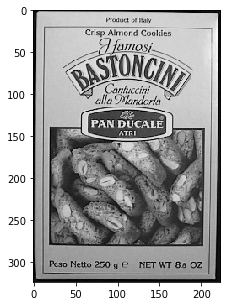

In [3]:
# Caricamento immagine
box = cv.imread('images/box.png',0)
plt.imshow(box, cmap='gray'); plt.show()

# Detection e descrizione SIFT

https://docs.opencv.org/3.4.2/d0/d13/classcv_1_1Feature2D.html#a8be0d1c20b08eb867184b8d74c15a677

In [4]:
# Detection e descrizione SIFT
sift = cv.xfeatures2d.SIFT_create()
(kps1, features1) = sift.detectAndCompute(box, None)

In [5]:
# Numero di keypoint rilevati
len(kps1)

604

In [6]:
# Descrittori corrispondenti
features1.shape

(604, 128)

In [7]:
# Informazioni disponibili per ciascun keypoint
print(type(kps1[0]))
print(dir(kps1[0]))

<class 'cv2.KeyPoint'>
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'angle', 'class_id', 'convert', 'octave', 'overlap', 'pt', 'response', 'size']


A ciascun keypoint sono associati:
* Un descrittore a 128 dimensioni (nella variabile ``features``)
* Una serie di proprietà (accessibili direttamente dal keypoint):
    * angle
    * class_id
    * octave
    * pt
    * response
    * size


In [8]:
# Esempio: coordinate del primo keypoint
kps1[0].pt

(3.161381721496582, 204.06150817871094)

### Visualizzazione keypoint

https://docs.opencv.org/3.4.2/d4/d5d/group__features2d__draw.html#gab958f8900dd10f14316521c149a60433

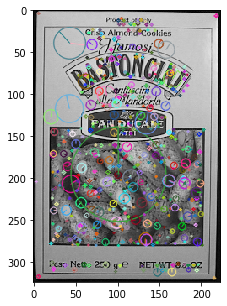

In [9]:
# Visualizzazione punti SIFT
box_kps = cv.drawKeypoints(box, kps1, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(box_kps); plt.show()

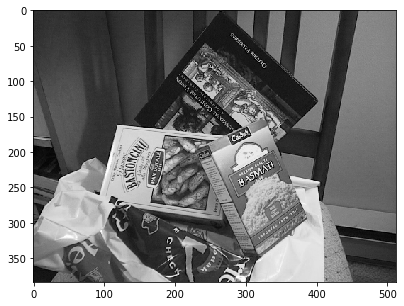

In [10]:
# Caricamento immagine background
scene = cv.imread('images/box_in_scene.png',0)
plt.imshow(scene, cmap='gray'); plt.show()

In [11]:
# Detection e descrizione SIFT sulla seconda immagine
(kps2, features2) = sift.detectAndCompute(scene, None)

# Matching

https://docs.opencv.org/3.4.2/dc/dc3/tutorial_py_matcher.html

In [12]:
# Rilevamento corrispondenze features tra le due immagini
bf = cv.BFMatcher(crossCheck=True)
matches = bf.match(features1, features2)

In [13]:
# Numero di match tra le due immagini
len(matches)

398

In [14]:
# Informazioni associate a ciascun match
print(type(matches[0]))
print(dir(matches[0]))

<class 'cv2.DMatch'>
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'distance', 'imgIdx', 'queryIdx', 'trainIdx']


Ciascun match contiene le seguente informazioni:
* distance
* imgIdx
* queryIdx
* trainIdx

In [15]:
# Esempio: dettagli sul primo match.

In [16]:
# Indice keypoint della prima immagine (box)
matches[0].queryIdx

0

In [17]:
# Indice keypoint della seconda immagine (scene)
matches[0].trainIdx

881

### Visualizzazione match

https://docs.opencv.org/3.4.2/d4/d5d/group__features2d__draw.html#ga7421b3941617d7267e3f2311582f49e1

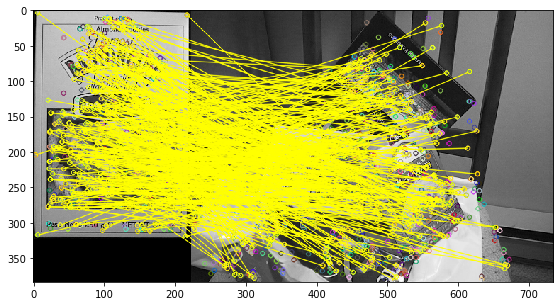

In [18]:
# Visualizzazione match
result = cv.drawMatches(box, kps1, scene, kps2, matches, None, matchColor=[255,255,0])
plt.imshow(result); plt.show()

**Nota:**

L'insieme dei match contiene molti falsi positivi.

Una possibilità è ordinare i match a partire dai più sicuri (quelli con descrittori molto simili, ovvero con distanza bassa),<br/>
e limitare la visualizzazione ai primi N

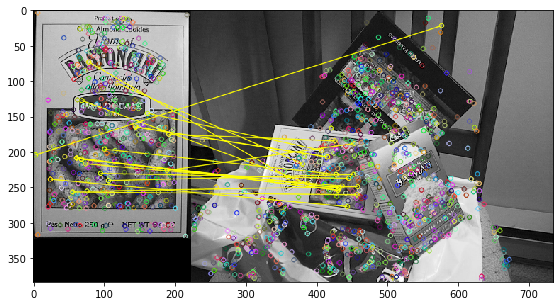

In [19]:
# Visualizzazione match filtrati
matches = sorted(matches, key=lambda x:x.distance)
result = cv.drawMatches(box, kps1, scene, kps2, matches[0:20], None, matchColor=[255,255,0])
plt.imshow(result); plt.show()

# Assignment

**Carichiamo le immagini** 

In [20]:
im1 = cv.imread('images/boat1.jpg',0)
im2 = cv.imread('images/boat2.jpg',0)
im3 = cv.imread('images/boat3.jpg',0)

**IMAGE STITCHING**

L'image stitching è l'operazione di unione di due immagini, nelle quali esiste una continuità di rappresentazione, in una sola.
Per fare ciò verranno eseguiti i seguenti passi.

1. Troviamo i keypoints delle due immagini e l'omografia, che a partire dai keypoints in comune tra le due immagini e i matching tra loro, vada a trovare l' omografia per fare la trasformazione tra il secondo set di punti e il primo.
2. Applichiamo quindi l'omografia alla seconda immagine.
3. Integriamo anche le altre immagini con quella che abbiamo ottenuto.

Andremo quindi a creare un'omografia per passare dalla prima immagine (blocco sottostante) alla terza (blocco ancora sottostante).

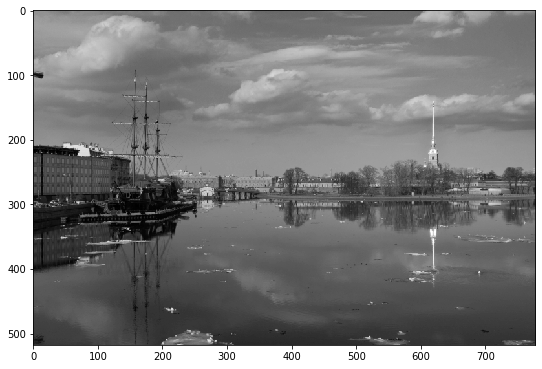

In [21]:
plt.figure(figsize=(9,10))
plt.imshow(im1,cmap='gray')

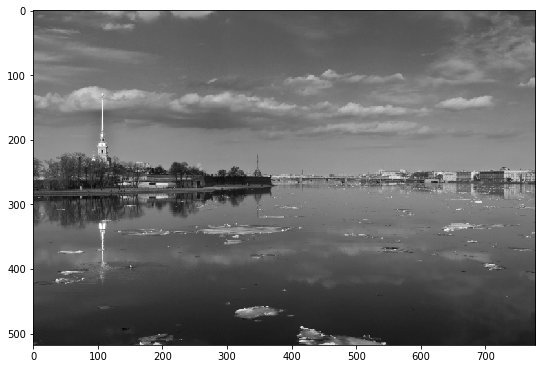

In [22]:
plt.figure(figsize=(9,10))
plt.imshow(im3,cmap='gray')

**FASE 1**

**KEYPOINTS**

Con "Keypoints", anche detti punti interessanti, intendiamo quei punti che possono essere sempre ritrovati anche nell'immagine di partenza nonostante i cambiamenti apportati all'immagine (rotazioni, allargamenti o restringimenti, omografie, trasformazioni proiettive ecc).
Per andare a trovare i Keypoints, applichiamo la funzione *sift.detectAndCompute(...)*, che trova i punti e le feature ad essi associati. 

In [23]:
sift = cv.xfeatures2d.SIFT_create()
(kps1, features1) = sift.detectAndCompute(im1, None)
(kps3, features3) = sift.detectAndCompute(im3, None)

Andiamo a fare il matching tra i punti interessanti delle due immagini, e dato che possono essere presenti anche molti falsi positivi, quello che facciamo sarà andare ad ordinare i punti secondo la loro distanza, e visualizzarne solamente i primi 50.

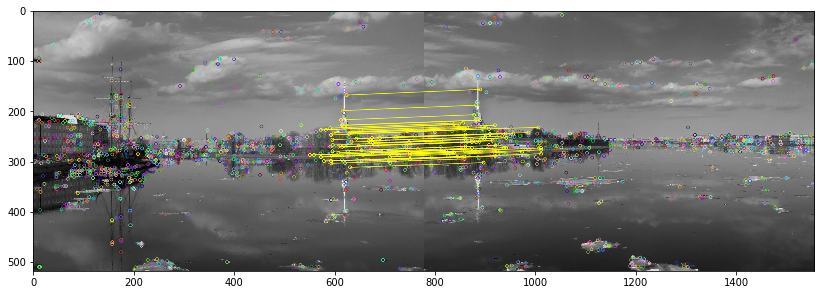

In [24]:
bf = cv.BFMatcher(crossCheck = True)
matches = bf.match(features1,features3)
matches = sorted(matches, key=lambda x: x.distance)[0:50]

res=cv.drawMatches( im1, kps1, im3, kps3, matches, None, matchColor = [255,255,0])
plt.figure(figsize=(14,10))
plt.imshow(res,cmap='gray')

I punti colorati che vediamo sull'immagine sono i punti di interesse, di cui quelli uniti da una linea sono i 50 punti che si assomigliano e distano di meno.

**OMOGRAFIA**

A questo punto possiamo andare a trovare l'omografia che descrive la trasformazione tra il secondo set di punti e il primo set. Per trovarla andremo ad utilizzare la funzione *findHomography* che calcola la matrice di omografia a partire dalla lista dei punti simili e il loro matching.

In [25]:
def findhomography(kps1, kps3, matches):
    p1 = np.zeros((len(matches), 2))#, dtype=np.float32)
    p2 = np.zeros((len(matches), 2))#, dtype=np.float32)
    for elem, match in enumerate(matches):
        p1[elem, :] = kps1[match.queryIdx].pt
        p2[elem, :] = kps3[match.trainIdx].pt
    H, mask = cv.findHomography(p2, p1, cv.RANSAC)
    return H

In [26]:
H = findhomography(kps1, kps3, matches)
print(H)

[[ 5.66164855e-01 -2.32774505e-02  5.21754236e+02]
 [-1.51703689e-01  9.08561515e-01  3.10561554e+01]
 [-5.48138954e-04 -3.88977373e-05  1.00000000e+00]]


**FASE 2**

A questo punto possiamo andare ad applicare l'omografia alla nostra seconda immagine. Per farlo andiamo a definire *myWarp*, che si basa sulla funzione cv.WarpPerspective. La funzione *myWarp* prende in ingresso come parametri le due immagini di cui vogliamo andare a fare l'unione e l'omografia che abbiamo precedentmente ottenuto. Essa restituirà come immagine, quella che è la base per la nuova immagine, andando ad orientare in maniera corretta la seconda immagine perché possa essere unita alla prima.

cv.warpPerspective invece richiede come input la seconda immagine, l'omografia e che vegnano specificate le dimensioni dell'immagine che vogliamo ottenere in output, queste saranno uguali alla somma della larghezza delle due immagini, e l'altezza sarà quella della prima immagine che non è stata modificata.

In [27]:
def myWarp(im1, im2, H):
    return cv.warpPerspective(im2, H, (im1.shape[1] + im2.shape[1], im1.shape[0]))

Applichiamo la funzione alla nostra seconda immagine e ne vediamo il risultato ottenuto.

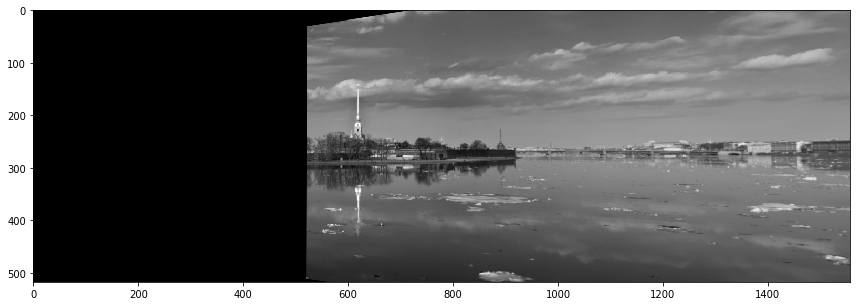

In [28]:
warped = myWarp(im1, im3, H)
plt.imshow(warped, cmap='gray'); plt.show()

**FASE 3**

Andiamo a questo punto ad integrare l'altra immagine, in modo da ottenere il panorama completo.

In [29]:
def myCollage(image1, image2):
    image1[0:image1.shape[0], 0:image2.shape[1]] = image2
    return image1

Queste erano le due immagini di partenza che volevamo andare ad unire.

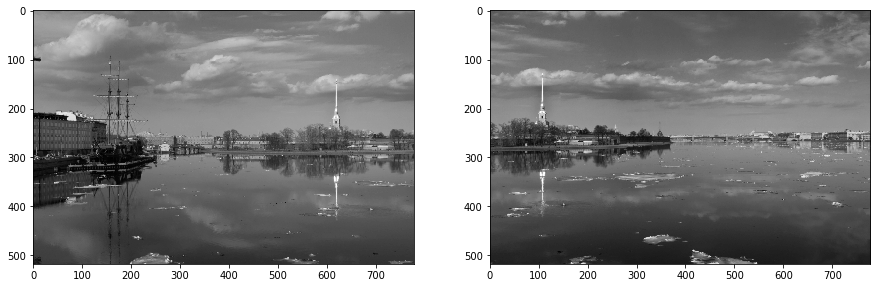

In [30]:
plt.subplot(1,2,1)
plt.imshow(im1,cmap = 'gray')

plt.subplot(1,2,2)
plt.imshow(im3,cmap = 'gray')

plt.show()

Questa invece è l'immagine completa che abbiamo ottenuto dall'unione delle due soprastanti.

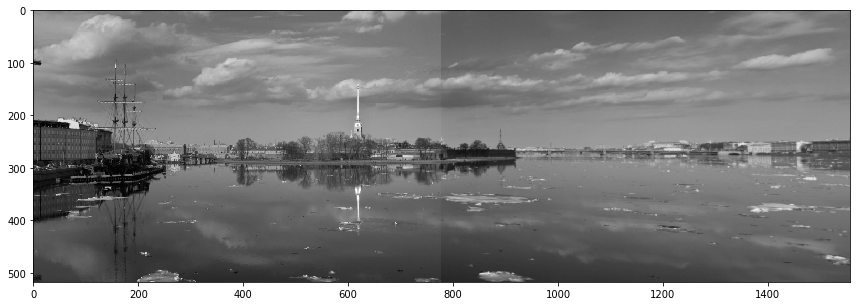

In [31]:
result = myCollage(warped, im1)
plt.imshow(result, cmap='gray'); plt.show()

Una possibile miglioria potrebbe essere cercare di mitigare lo stacco di colore che c'è tra le due immagini che sono state unite tra di loro.